# Carregamento dos dados

In [1]:
import pandas as pd
data = pd.read_csv('apps_reviews_validacao.xlsx - apps_reviews.csv', sep=',')

In [2]:
data.describe()

,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5
count,3011,3011,3011,3011,3011,1
unique,3011,10,3011,3,7,1
top,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,O app da Shopee é razoável. Apesar de ser fáci...,negative,disgust,X
freq,1,303,1,1742,952,1


In [3]:
data.loc[0,'content']

'O app da Shopee é razoável. Apesar de ser fácil de utilizar, apresenta alguns bugs. Por exemplo: Sugestão de palavra errada no campo de pesquisa que acarreta na busca errada. Sugestões de produtos que não têm nada a ver com coisas de nosso interesse. Dificuldade de acesso de alguns jogos ou travamento durante alguma jogada. Falhas para carregar certos anexos para avaliação dos produtos. No geral, são problemas que se pode contornar, pois não ocorrem com tanta frequência.'

# Pré-processamento



In [4]:
import regex # trabalhar com expressões regulares
data['content'] = data['content'].apply(lambda x: regex.sub(r'[^\p{Latin}]', u' ', str(x)))


In [5]:
data.loc[0,'content']

'O app da Shopee é razoável  Apesar de ser fácil de utilizar  apresenta alguns bugs  Por exemplo  Sugestão de palavra errada no campo de pesquisa que acarreta na busca errada  Sugestões de produtos que não têm nada a ver com coisas de nosso interesse  Dificuldade de acesso de alguns jogos ou travamento durante alguma jogada  Falhas para carregar certos anexos para avaliação dos produtos  No geral  são problemas que se pode contornar  pois não ocorrem com tanta frequência '

colocando textos minusculo

In [6]:
data['content'] = data['content'].apply(lambda x: str(x).lower())

In [7]:
data.loc[0,'content']

'o app da shopee é razoável  apesar de ser fácil de utilizar  apresenta alguns bugs  por exemplo  sugestão de palavra errada no campo de pesquisa que acarreta na busca errada  sugestões de produtos que não têm nada a ver com coisas de nosso interesse  dificuldade de acesso de alguns jogos ou travamento durante alguma jogada  falhas para carregar certos anexos para avaliação dos produtos  no geral  são problemas que se pode contornar  pois não ocorrem com tanta frequência '

removendo stopwords

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Baixar os recursos necessários
nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(texto):
    # Obter a lista de stopwords em português
    stops_list = stopwords.words("portuguese")
    # Tokenizar o texto
    word_tokens = word_tokenize(texto)
    # Remover as stopwords
    texto_sem_stops = [w for w in word_tokens if w.lower() not in stops_list]
    return " ".join(texto_sem_stops)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arthu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arthu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
data['content'] = data['content'].apply(remove_stopwords)

In [10]:
data.loc[0,'content']

'app shopee razoável apesar fácil utilizar apresenta alguns bugs exemplo sugestão palavra errada campo pesquisa acarreta busca errada sugestões produtos têm nada ver coisas interesse dificuldade acesso alguns jogos travamento durante alguma jogada falhas carregar certos anexos avaliação produtos geral problemas pode contornar pois ocorrem tanta frequência'

# Extração da features (representação de texto em formato vetorial)

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['content'])
palavras = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=palavras)
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import joblib
vectorizer = CountVectorizer()

In [13]:
BoW_matriz = vectorizer.fit_transform(data['content'])
joblib.dump(vectorizer, 'vectorizer.pkl')
palavras = vectorizer.get_feature_names_out()

In [14]:
BOW_dataframe=pd.DataFrame(BoW_matriz.toarray(),columns=palavras)
BOW_dataframe

,aap,aba,abaixa,abaixada,abaixado,abaixar,abaixaram,abaixe,abaixei,abaixem,...,últimamente,últimas,último,últimos,única,únicas,único,únicos,úteis,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Treinamento e teste

Aqui vamos estimar a performance do classificador utilizando uma subdivisão nos dados. Vamos dividir os dados (BOW_dataframe) em um conjunto de teste e outro treinamento. 

In [15]:
textos_tfidf = tfidf_df
categorias = data['sentiment']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_df, categorias, test_size=0.2) #20% para teste.

# X_train contém os 80% dos dados - treinamento
# y_train contém os 80% das categorias (atributo alvo) - treinamento

# X_test contém os 20% dos dados - teste
# y_test contém os 20% das categorias - teste

In [17]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
predicoes = naive_bayes.predict(X_test)# recebe os 20% dos dados de teste sem as categorias - "escondidas"


In [18]:
from sklearn.metrics import classification_report
import numpy as np

print(classification_report(y_test, predicoes))


              precision    recall  f1-score   support

       anger       0.75      0.34      0.46       152
     disgust       0.51      0.76      0.61       186
        fear       0.00      0.00      0.00         7
   happiness       1.00      0.01      0.03        69
     neutral       0.00      0.00      0.00        11
     sadness       0.56      0.80      0.66       178

    accuracy                           0.56       603
   macro avg       0.47      0.32      0.29       603
weighted avg       0.62      0.56      0.50       603



C:\Users\arthu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\arthu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\arthu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<p style="color:blue">Como sabemos de antemão a categoria correta do conjunto de teste, vamos avaliar a performance do nosso classificador de notícias Bayesiano</p>

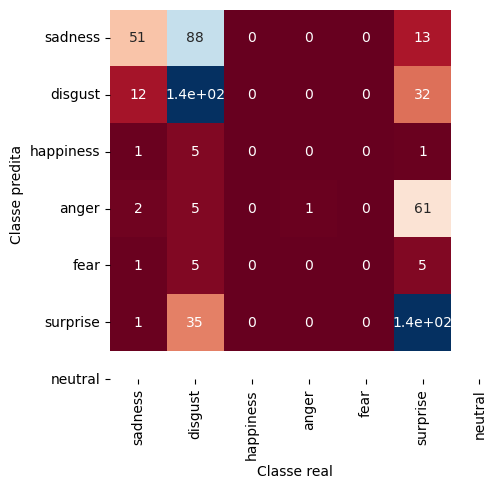

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicoes)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, 
            xticklabels=categorias.unique(),
            yticklabels=categorias.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()


# Teste para uma nova avaliação


In [20]:
naive_bayes = MultinomialNB()
naive_bayes.fit(textos_tfidf, categorias)

MultinomialNB()

In [21]:
import pandas as pd

# Lista de avaliações e emoções retiradas do Google Play refêrentes oo app da shopee
dataTeste ={
    'review': ['Compro a bastante tempo, nunca tive problemas, o que mudou nestes últimos dois meses, a encomenda sai, mas não chega, a data de entrega é alterada automaticamente no aplicativo e a plataforma não resolve a citação, não faz o reembolso e nisso, estou a quase dois meses sem receber a encomenda e sem reembolso, a empresa não soluciona nada! E assim se repete com novas compras!',
    'As lojas são boas, tem bons vendedores. Mas a Shopee é péssima. Tem um atendimento ao cliente péssimo, não sabem o que estão fazendo. Logística terrível e nunca entregam no prazo. E não sabem dar uma resposta coerente. Pode falar com 10 atendentes diferentes e todos vão falar uma versão diferente. O mínimo é uma estrela, mas se tivesse a opção zero, essa seria a minha com toda a certeza. Acho que as palavras incompetência e descaso resumem o serviço prestado.',
    'Eu até que ainda compro no App,mas,depois que comprei um produto,onde o vendedor garantiu ser original,porém não era original e o produto estragou em 1 mês e eu não pude pedir a devolução ou reembolso,fiquei muito desanimado com a Shopee. E,além de tudo, fizeram um programa fidelidade que é a maior enganação, me rebaixaram de nível, mesmo tendo alcançado os pontos necessários pra subir de nível. Esse programa é somente pra recompensar a própria shoppe e nunca os usuários.'],
    'emotion': ['anger','anger','sadness']
    }

df = pd.DataFrame(dataTeste)

print(df.head())


                                              review  emotion
0  Compro a bastante tempo, nunca tive problemas,...    anger
1  As lojas são boas, tem bons vendedores. Mas a ...    anger
2  Eu até que ainda compro no App,mas,depois que ...  sadness


In [22]:
df['review'] = df['review'].apply(lambda x: regex.sub(r'[^\p{Latin}]', u' ', str(x)))
df['review'] = df['review'].apply(lambda x: str(x).lower())
df['review'] = df['review'].apply(remove_stopwords)

df.loc[0,'review']

'compro bastante tempo nunca problemas mudou nestes últimos dois meses encomenda sai chega data entrega alterada automaticamente aplicativo plataforma resolve citação faz reembolso nisso quase dois meses receber encomenda reembolso empresa soluciona nada assim repete novas compras'

In [23]:
vectorizer = joblib.load('vectorizer.pkl')
BoW_matrizTeste = vectorizer.transform(df['review'])

In [24]:
emotion = naive_bayes.predict(BoW_matrizTeste)
print('Emoção prevista: ')
print(emotion)
print('Emoção real: ')
print(dataTeste['emotion'])

Emoção prevista: 
['anger' 'anger' 'anger']
Emoção real: 
['anger', 'anger', 'sadness']


C:\Users\arthu\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
